## Analysis
### 
1. Urban areas have a significantly larger percentage of drivers per city type.
2. Suburban area have a higher average fare revenue (by percentage).
3. Rural areas produce a higher average fare revenue than urban areas

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import seaborn as sns

In [2]:
#Using Pandas to Chart a DataFrame
f1_name = os.path.join('ride_data.csv')
ride_df = pd.read_csv(f1_name)
#ride_df

In [3]:
f2_name = os.path.join('city_data.csv')
city_df = pd.read_csv(f2_name)
#city_df

In [4]:
pyberDB_df = pd.merge(ride_df,city_df,how='inner', left_on='city',right_on='city')
pyberDB_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
pyber1_df=pyberDB_df.copy()

pb_cityfare = pyber1_df.groupby('city')[['fare']].mean()
pb_cityfare['farecount'] = pyber1_df.groupby('city')[['fare']].count()
pytemp4 = pyber1_df.groupby(['city','type'])[['driver_count']].count()
#pbcitytype = pyber1_df.groupby('city')[['type']]
pb_citydriver = pyber1_df.groupby('city')[['driver_count']].count()


pbcf = []
pbcf = pb_cityfare['fare']
pbcd = []
pbcd = pb_citydriver['driver_count']

pbbubble = pytemp4


pbbubble.head(2)


,,driver_count
city,type,
Alvarezhaven,Urban,31
Alyssaberg,Urban,26


In [6]:

pbdriver = pd.DataFrame(pyber1_df, columns= ['city', 'driver_count'])
pbdriver2 = pbdriver.drop_duplicates(['city'], inplace=True)
pbdriver2

In [7]:

print(pb_citydriver.min(),pb_citydriver.max())


driver_count    1
dtype: int64 driver_count    64
dtype: int64


In [8]:
import seaborn as sns

plt.scatter(pb_cityfare.farecount, pb_cityfare.fare,
            c=pb_cityfare.farecount, edgecolor='black',facecolors='red',
            s=pbbubble.driver_count*4, alpha = 0.5)
#make c= the city type
#plt.colorbar()

#plt.colorbar()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.figure(figsize=(100,20))
plt.legend(loc=1, ncol=2)
plt.grid(True)



#plt.show()

In [9]:

urban_df = pyber1_df[pyber1_df['type']=='Urban']
#urban_df['farecount']=urban_df['city'].count()
urban_1 = urban_df.groupby('city')[['fare']].mean()
urban_2 = urban_df.groupby('city')[['fare']].count()
urban_2=urban_2.rename(columns={'fare':'farecount'})
urban_df=urban_df.drop_duplicates(['city'])

urban_3 = urban_df[['city','driver_count']]
urban_3=urban_3.reset_index(drop=True)
#urban_df = urban_df.set_index(['city'], inplace=False)
urban_3 = urban_3.set_index(['city'], inplace=False)
u1=[]
u2=[]
u3=[]
u1 = urban_1['fare']
u2 = urban_2['farecount']
u3 = urban_3['driver_count']
urban_rp = pd.DataFrame({'avgfare':u1, 'farecount':u2, 'drivercount':u3})


#urban_rp

In [10]:
suburban_df = pyber1_df[pyber1_df['type']=='Suburban']

#suburban_df['avgfare']=suburban_df['fare'].mean()
#suburban_df['farecount']=suburban_df['fare'].count()
#suburban_df.head()
suburban_1 = suburban_df.groupby('city')[['fare']].mean()
suburban_2 = suburban_df.groupby('city')[['fare']].count()
suburban_2=suburban_2.rename(columns={'fare':'farecount'})
suburban_df=suburban_df.drop_duplicates(['city'])

suburban_3 = suburban_df[['city','driver_count']]
suburban_3=suburban_3.reset_index(drop=True)
#urban_df = urban_df.set_index(['city'], inplace=False)
suburban_3 = suburban_3.set_index(['city'], inplace=False)
su1=[]
su2=[]
su3=[]
su1 = suburban_1['fare']
su2 = suburban_2['farecount']
su3 = suburban_3['driver_count']
suburban_rp = pd.DataFrame({'avgfare':su1, 'farecount':su2, 'drivercount':su3})
#suburban_rp

In [11]:

rural_df = pyber1_df[pyber1_df['type']=='Rural']

#rural_df['avgfare']=rural_df['fare'].mean()
#rural_df['farecount']=rural_df['fare'].count()
#rural_df.head()

rural_1 = rural_df.groupby('city')[['fare']].mean()
rural_2 = rural_df.groupby('city')[['fare']].count()
rural_2=rural_2.rename(columns={'fare':'farecount'})
rural_df=rural_df.drop_duplicates(['city'])

rural_3 = rural_df[['city','driver_count']]
rural_3=rural_3.reset_index(drop=True)
#urban_df = urban_df.set_index(['city'], inplace=False)
rural_3 = rural_3.set_index(['city'], inplace=False)
r1=[]
r2=[]
r3=[]
r1 = rural_1['fare']
r2 = rural_2['farecount']
r3 = rural_3['driver_count']
rural_rp = pd.DataFrame({'avgfare':r1, 'farecount':r2, 'drivercount':r3})
#rural_rp

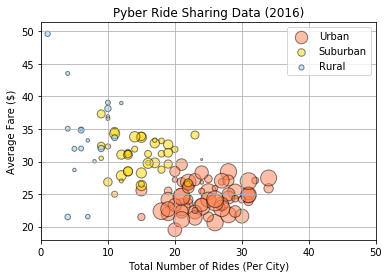

In [21]:
#import matplotlib.patches as mpatches

#lgd = ['Rural','Suburban','Urban']
#colors = ['lightskyblue','gold','coral']
#sc = mpatches.Patch(color=colors, label=lgd)
plt.scatter(urban_rp.farecount, urban_rp.avgfare,
            c='coral', edgecolor='black',facecolors='coral',
            s=urban_rp.drivercount*4, alpha = 0.5, label='Urban')

plt.scatter(suburban_rp.farecount, suburban_rp.avgfare,
            c='gold', edgecolor='black',facecolors='gold',
            s=suburban_rp.drivercount*4, alpha = 0.5, label='Suburban')

plt.scatter(rural_rp.farecount, rural_rp.avgfare,
            c='lightskyblue', edgecolor='black',facecolors='lightskyblue',
            s=rural_rp.drivercount*4, alpha = 0.5, label='Rural')
#make c= the city type
#plt.colorbar()

#plt.colorbar()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlim(0,50,10)
#plt.legend(handles=[sc])
plt.legend(loc=1, ncol=1)
plt.grid(True)



plt.show()

In [13]:
#sns.lmplot(x='farecount',y='fare_data', data = pb_cityfare)

In [14]:

#Total Fares by City Type
pb_cityridetype = pyber1_df.groupby(['type'])[['fare']].sum()
pb_cityridetype['total'] = pyber1_df['fare'].sum()
pb_cityridetype['typepct'] = pb_cityridetype['fare']/pb_cityridetype['total']*100
pb_cityridetype


,fare,total,typepct
type,,,
Rural,4255.09,64669.12,6.579786
Suburban,20335.69,64669.12,31.445750
Urban,40078.34,64669.12,61.974463


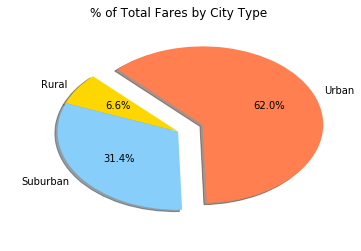

In [15]:
pyb = pd.DataFrame(pb_cityridetype)
#pyb.set_index('type', inplace=True)
pyb1 = []
pyb2 = []
cols = ['gold','lightskyblue','coral']
pyb.head()
i = 0
for index, row in pyb.iterrows():
    pyb1.append(index)
    pyb2.append(row['typepct'])
    
    i +=1
    

plt.pie(pyb2,
        labels=pyb1,
        colors=cols,
        startangle=135,
        explode=(0,0,0.2),
        shadow=True,
        radius=0.9,
        autopct='%1.1f%%'
       )


plt.title('% of Total Fares by City Type')

plt.show()

In [16]:
#Total Rides by City Type
pb_cityridetype = pyber1_df.groupby(['type'])[['fare']].count()
pb_cityridetype['totalcount'] = pyber1_df['fare'].count()
pb_cityridetype['ridepct'] = pb_cityridetype['fare']/pb_cityridetype['totalcount']*100
pb_cityridetype

,fare,totalcount,ridepct
type,,,
Rural,125,2407,5.193187
Suburban,657,2407,27.295388
Urban,1625,2407,67.511425


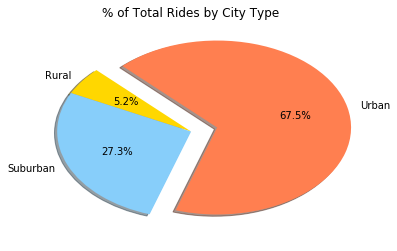

In [17]:
pyb = pd.DataFrame(pb_cityridetype)
#pyb.set_index('type', inplace=True)
pyc1 = []
pyc2 = []
cols = ['gold','lightskyblue','coral']
pyb.head()
i = 0
for index, row in pyb.iterrows():
    pyc1.append(index)
    pyc2.append(row['ridepct'])
    i +=1
    
plt.pie(pyc2,
        labels=pyc1,
        colors=cols,
        startangle=135,
        explode=(0,0,0.2),
        shadow=True,
        autopct='%1.1f%%'
       )

plt.title('% of Total Rides by City Type')

plt.show()

In [18]:
pyber2_df=pyberDB_df.copy()
pb3 = pyber2_df.drop_duplicates(['city','driver_count'])
pb3.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
27,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
49,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
68,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
94,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [19]:
#Total Drivers by City Type

pb_drivertype = pb3.groupby(['type'])[['driver_count']].count()
pb_drivertype['totaldcount'] = pb3['driver_count'].count()
pb_drivertype['driverpct'] = pb_drivertype['driver_count']/pb_drivertype['totaldcount']*100
pb_drivertype

,driver_count,totaldcount,driverpct
type,,,
Rural,18,126,14.285714
Suburban,42,126,33.333333
Urban,66,126,52.380952


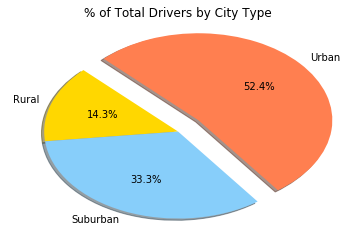

In [20]:
pyd = pd.DataFrame(pb_drivertype)
#pyb.set_index('type', inplace=True)
pyd1 = []
pyd2 = []
cols = ['gold','lightskyblue','coral']
pyd.head()
i = 0
for index, row in pyd.iterrows():
    pyd1.append(index)
    pyd2.append(row['driverpct'])
    i +=1
    
plt.pie(pyd2,
        labels=pyd1,
        colors=cols,
        startangle=135,
        explode=(0,0,0.2),
        shadow=True,
        autopct='%1.1f%%'
       )

plt.title('% of Total Drivers by City Type')

plt.show()